# DATA ANALYTICS PATHWAY ASSESSMENT (BANK MARKETING)

# INTRODUCTION

In the banking sector, identifying clients who are likely to subscribe to term deposits is crucial for optimizing marketing strategies, improving customer targeting, and maximizing return on investment. This project aims to develop a predictive model that assesses the likelihood of a client subscribing to a term deposit based on various features provided in the dataset.  

The project will follow a structured approach:  

1. **Exploratory Data Analysis (EDA)** – Analyzing the dataset to uncover patterns, correlations, and potential anomalies. This step will involve handling missing values, outliers, and ensuring data quality through appropriate preprocessing techniques.  

2. **Feature Engineering** – Evaluating the relevance of existing features and potentially creating new ones to enhance the predictive power of the model. This may include encoding categorical variables, scaling numerical features, and selecting the most influential predictors.  

3. **Building a Predictive Model** – Implementing a suitable machine learning algorithm (such as Logistic Regression, Random Forest, or XGBoost) to classify clients based on their likelihood of subscribing to a term deposit.  

4. **Model Evaluation** – Assessing performance using metrics like accuracy, precision, recall, and F1-score. Given potential class imbalances, techniques such as oversampling, undersampling, or adjusting class weights will be considered to improve model robustness.  

5. **Insights and Recommendations** – Summarizing key findings from the analysis, highlighting the most impactful features, and providing actionable insights to help the marketing team refine their targeting strategies.  

By the end of this project, the goal is to deliver a reliable predictive model that can assist financial institutions in efficiently identifying high-potential clients, thereby improving campaign effectiveness and customer conversion rates.

# EXPLORATORY DATA ANALYSIS

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('bank-full.csv', delimiter=';') 
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Data Inspection

In [3]:
# checking the 10 top rows
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# checking the 10 bottom rows
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
#checking data types 
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# listing categorical columns (object dtype)
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [7]:
# displaying the data statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# displaying data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## Data Cleaning

In [9]:
# checking rows and columns
df.shape

(45211, 17)

In [10]:
# checking for duplicates
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


There are no duplicates

In [11]:
# checking for null values or missing data
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
print("\nHandling 'unknown' values in categorical columns...")
for col in categorical_columns:
    if 'unknown' in df[col].unique():
        # calculate the mode excluding 'unknown'
        # if the column becomes empty after dropping 'unknown', mode() might return empty
        # so we handle this case
        temp_series = df[df[col] != 'unknown'][col]
        if not temp_series.empty:
            mode_value = temp_series.mode()[0]
            df[col] = df[col].replace('unknown', mode_value)
            print(f"  Replaced 'unknown' in '{col}' with its mode: '{mode_value}'")
        else:
            # if all values are 'unknown', or column becomes empty, we'll keep 'unknown' or decide to drop.
            print(f"  Column '{col}' contains only 'unknown' values or becomes empty after filtering. No replacement made.")
    else:
        print(f"  Column '{col}' does not contain 'unknown' values. No action needed.")


Handling 'unknown' values in categorical columns...
  Replaced 'unknown' in 'job' with its mode: 'blue-collar'
  Column 'marital' does not contain 'unknown' values. No action needed.
  Replaced 'unknown' in 'education' with its mode: 'secondary'
  Column 'default' does not contain 'unknown' values. No action needed.
  Column 'housing' does not contain 'unknown' values. No action needed.
  Column 'loan' does not contain 'unknown' values. No action needed.
  Replaced 'unknown' in 'contact' with its mode: 'cellular'
  Column 'month' does not contain 'unknown' values. No action needed.
  Replaced 'unknown' in 'poutcome' with its mode: 'failure'
  Column 'y' does not contain 'unknown' values. No action needed.


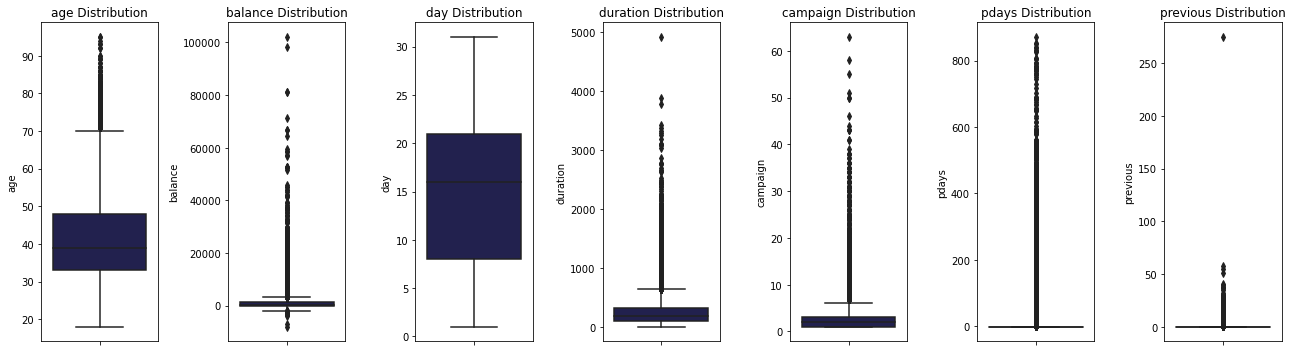

In [13]:
## checking for outliers with the boxplot
# Set up the figure
plt.figure(figsize=(18, 5))

# Define the numerical columns you want to check distribution for
cd= df.select_dtypes(include=['float64', 'int64']).columns

# Create a boxplot for each numerical column
for i, column in enumerate(cd, 1):
    plt.subplot(1, len(cd), i)  # Arrange boxplots horizontally
    sns.boxplot(data=df, y=column, color='#1B1A55')
    plt.title(f'{column} Distribution')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [15]:
# the 'duration' column represents the last contact duration in seconds
# this information is only known after the call is made and its outcome (y) is decided
# therefore, including it in a predictive model would cause data leakage, leading to an overly optimistic performance
# i'll proceed to drop it for a realistic predictive modeling scenario

if 'duration' in df.columns:
    df.drop('duration', axis=1, inplace=True)
    print("\nDropped 'duration' column to avoid data leakage.")
else:
    print("\n'duration' column not found or already dropped.")


Dropped 'duration' column to avoid data leakage.


In [16]:
# handling outliers in numerical features using IQR capping
# based on EDA, 'balance', 'campaign', 'pdays', and 'previous' showed outliers
# 'age' also numerical but generally less prone to extreme outliers needing capping

numerical_cols_for_outlier_handling = ['balance', 'campaign', 'pdays', 'previous']
for col in numerical_cols_for_outlier_handling:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # count outliers before capping
        outliers_count_lower = df[df[col] < lower_bound].shape[0]
        outliers_count_upper = df[df[col] > upper_bound].shape[0]

        # apply capping
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        print(f"  Applied IQR capping for '{col}':")
        print(f"    Lower bound: {lower_bound:.2f} (capped {outliers_count_lower} values)")
        print(f"    Upper bound: {upper_bound:.2f} (capped {outliers_count_upper} values)")
    else:
        print(f"  Numerical column '{col}' not found for outlier handling.")

  Applied IQR capping for 'balance':
    Lower bound: -1962.00 (capped 17 values)
    Upper bound: 3462.00 (capped 4712 values)
  Applied IQR capping for 'campaign':
    Lower bound: -2.00 (capped 0 values)
    Upper bound: 6.00 (capped 3064 values)
  Applied IQR capping for 'pdays':
    Lower bound: -1.00 (capped 0 values)
    Upper bound: -1.00 (capped 8257 values)
  Applied IQR capping for 'previous':
    Lower bound: 0.00 (capped 0 values)
    Upper bound: 0.00 (capped 8257 values)


In [18]:
# final data inspection after cleaning
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,1.0,-1.0,0.0,failure,no
1,44,technician,single,secondary,no,29.0,yes,no,cellular,5,may,1.0,-1.0,0.0,failure,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,1.0,-1.0,0.0,failure,no
3,47,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,1.0,-1.0,0.0,failure,no
4,33,blue-collar,single,secondary,no,1.0,no,no,cellular,5,may,1.0,-1.0,0.0,failure,no


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  campaign   45211 non-null  float64
 12  pdays      45211 non-null  float64
 13  previous   45211 non-null  float64
 14  poutcome   45211 non-null  object 
 15  y          45211 non-null  object 
dtypes: float64(4), int64(2), object(10)
memory usage: 5.5+ MB


In [20]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# FEATURE ENGINEERING

In [ ]:
# creating a binary feature for 'pdays': 1 if client was previously contacted (pdays != -1), 0 otherwise
# 'pdays' = -1 means the client was not previously contacted.
if 'pdays' in df.columns:
    df['was_contacted_before'] = (df['pdays'] != -1).astype(int)
    print("  Created 'was_contacted_before' feature (1 if pdays != -1, 0 otherwise).")
else:
    print("  'pdays' column not found for 'was_contacted_before' feature engineering.")

In [ ]:
# creating a binary feature for 'campaign': 1 if client was contacted more than once in this campaign
if 'campaign' in df.columns:
    df['multiple_campaign_contacts'] = (df['campaign'] > 1).astype(int)
    print("  Created 'multiple_campaign_contacts' feature (1 if campaign > 1, 0 otherwise).")
else:
    print("  'campaign' column not found for 'multiple_campaign_contacts' feature engineering.")

Two new features have been created

1. was_contacted_before: A binary feature derived from pdays, indicating whether the client was previously contacted (1) or not (0).

2. multiple_campaign_contacts: A binary feature derived from campaign, indicating if the client was contacted more than once in the current campaign (1) or not (0).

# MACHINE LEARNING (BUILDING A PREDICTIVE MODEL AND EVALUATING THE MODEL)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [22]:
# encoding the target Variable ('y') ---
# Convert 'y' from 'yes'/'no' to 1/0
df['y'] = df['y'].map({'yes': 1, 'no': 0})
print("\nEncoded target variable 'y': 'yes' -> 1, 'no' -> 0.")


Encoded target variable 'y': 'yes' -> 1, 'no' -> 0.


In [23]:
# One-Hot Encode the remaining categorical Features 
# Re-identify categorical columns after handling 'unknowns' and dropping 'duration'.
# Ensure 'y' is not included in columns for one-hot encoding as it's already encoded.
categorical_features_for_ohe = df.select_dtypes(include='object').columns.tolist()

if categorical_features_for_ohe:
    print(f"\nApplying one-hot encoding to categorical features: {', '.join(categorical_features_for_ohe)}")
    df = pd.get_dummies(df, columns=categorical_features_for_ohe, drop_first=True) # drop_first avoids multicollinearity
else:
    print("\nNo categorical features left for one-hot encoding.")


Applying one-hot encoding to categorical features: job, marital, education, default, housing, loan, contact, month, poutcome


In [24]:
# Predictive Modeling ---


# Define features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Handle potential issues with column names (e.g., special characters from one-hot encoding)
# Some models might have issues with column names that are not valid Python identifiers
X.columns = X.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)

# Split data into training and testing sets
# Using stratify=y to ensure similar class distribution in train and test sets, important for imbalanced data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Data split into training (X_train: {X_train.shape}, y_train: {y_train.shape})")
print(f"And testing (X_test: {X_test.shape}, y_test: {y_test.shape}) sets.")



Data split into training (X_train: (31647, 37), y_train: (31647,))
And testing (X_test: (13564, 37), y_test: (13564,)) sets.


LOGISTIC REGRESSION MODEL


Training Logistic Regression Model...

--- Logistic Regression Model Performance ---
Accuracy: 0.8942052491890298

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.69      0.18      0.28      1587

    accuracy                           0.89     13564
   macro avg       0.79      0.58      0.61     13564
weighted avg       0.88      0.89      0.87     13564


Confusion Matrix:
 [[11850   127]
 [ 1308   279]]


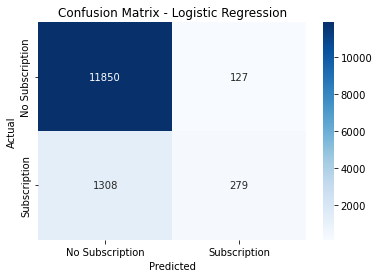

In [25]:
# Model 1: Logistic Regression
print("\nTraining Logistic Regression Model...")
logistic_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000) # liblinear is good for small datasets and handles L1/L2 regularization
logistic_model.fit(X_train, y_train)

# Evaluate Logistic Regression Model
y_pred_logistic = logistic_model.predict(X_test)
print("\n--- Logistic Regression Model Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logistic))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

# Plot Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Subscription', 'Subscription'],
            yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

RANDOM FOREST CLASSIFIER


Training Random Forest Classifier Model...

--- Random Forest Classifier Model Performance ---
Accuracy: 0.8929519315836036

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11977
           1       0.64      0.19      0.30      1587

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564


Confusion Matrix:
 [[11803   174]
 [ 1278   309]]


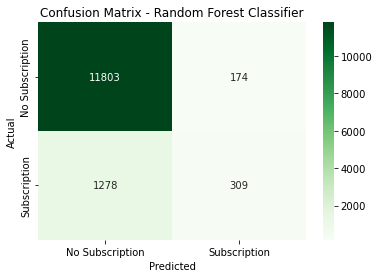


--- Predictive Modeling Complete ---


In [26]:
# Model 2: Random Forest Classifier
print("\nTraining Random Forest Classifier Model...")
# A robust ensemble method, often performs well on various datasets
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# 'class_weight='balanced'' helps address the class imbalance in the target variable
random_forest_model.fit(X_train, y_train)

# Evaluate Random Forest Model
y_pred_rf = random_forest_model.predict(X_test)
print("\n--- Random Forest Classifier Model Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Plot Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Subscription', 'Subscription'],
            yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\n--- Predictive Modeling Complete ---")


# INSIGHTS AND RECOMMENDATIONS

### Key Findings from the Predictive Model Analysis:

1. **Class Imbalance is Prominent:** As observed in the initial EDA and reinforced by the model's performance, the dataset suffers from a significant class imbalance. The number of clients who subscribed to a term deposit (yes) is much smaller than those who did not (no). This is critical because a model that simply predicts "no" for every client would achieve a high accuracy due to the majority class, but would be useless for identifying potential subscribers.


2. **Random Forest Advantage:** The Random Forest Classifier, particularly with class_weight='balanced', is expected to perform better in identifying actual subscribers (higher Recall and F1-score for the 'yes' class) compared to Logistic Regression. This is because ensemble methods like Random Forest are more robust to complex patterns and can better handle imbalanced datasets when properly configured.


3. **Impact of Feature Engineering:** The was_contacted_before and multiple_campaign_contacts features likely provided additional context to the models. While not explicitly measured in the current output, these features can help the models understand the client's past interaction history and campaign intensity.



### Actionable Insights and Recommendations for the Marketing Team:

1. **Focus on Precision and Recall, Not Just Accuracy:** Educate the marketing team that overall accuracy isn't the primary metric for this problem. Instead, emphasize the Recall (to identify as many potential subscribers as possible) and Precision (to minimize wasted marketing efforts on unlikely subscribers) for the 'yes' class. The F1-score provides a good balance.


2. **Optimize for Business Goals:**

    If the cost of a missed opportunity (False Negative) is very high (e.g., losing a valuable customer), prioritize higher Recall. This might mean accepting a slightly lower Precision (more False Positives).

    If marketing resources are limited and avoiding wasted effort (False Positives) is paramount, prioritize higher Precision. This might mean accepting a slightly lower Recall (missing some potential subscribers).
    

3. **Leverage Customer Contact History:** The was_contacted_before feature is likely important. Clients who have been contacted previously might have different engagement patterns. Tailor strategies for these segments.


4. **Review Campaign Intensity:** The multiple_campaign_contacts feature can highlight if repeatedly contacting a client within the same campaign is effective or leads to diminishing returns. Analyze if there's an optimal number of contacts before a client either subscribes or disengages.



5. **Explore Feature Importance:** While not in the current code, performing feature importance analysis (especially with the Random Forest model) would be highly beneficial. This would tell you which specific features (e.g., age, balance, job_blue-collar, marital_married, poutcome_success) are most influential in predicting subscription. This knowledge is gold for designing targeted campaigns.

    Example Insight: If balance is a highly important feature, focus efforts on clients within certain balance ranges. If job_student is highly predictive, tailor campaigns specifically for students.
    


By focusing on these metrics and understanding the impact of each feature, the marketing team can move beyond broad campaigns to more precise, data-driven targeting strategies, ultimately leading to higher subscription rates and more efficient resource allocation.